No segments found in data\signals_2024-03-04\dataset_0\TBI_001_v2_1_2_20.hdf5


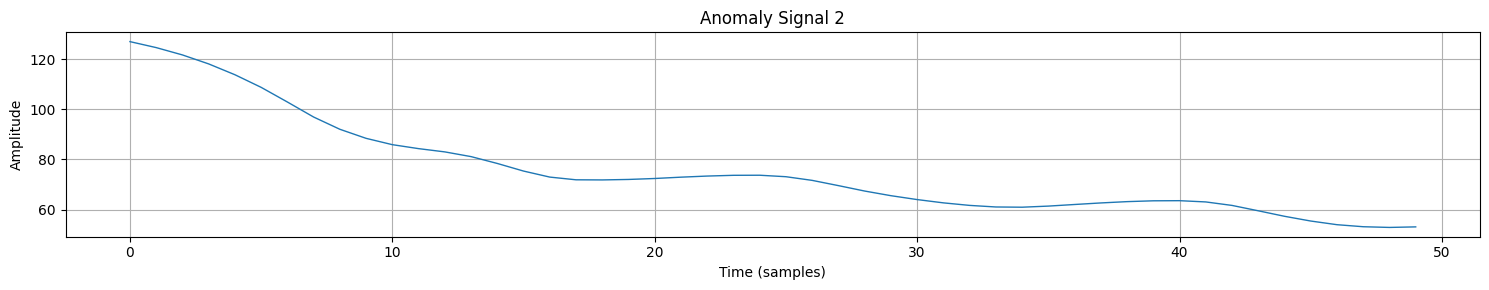

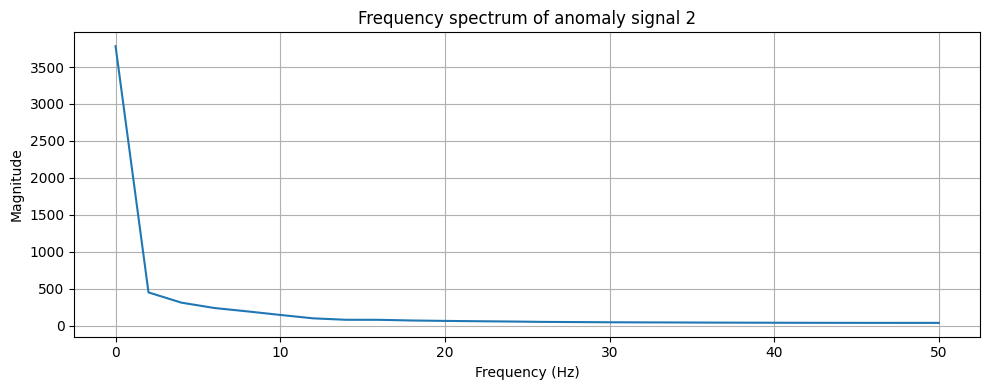

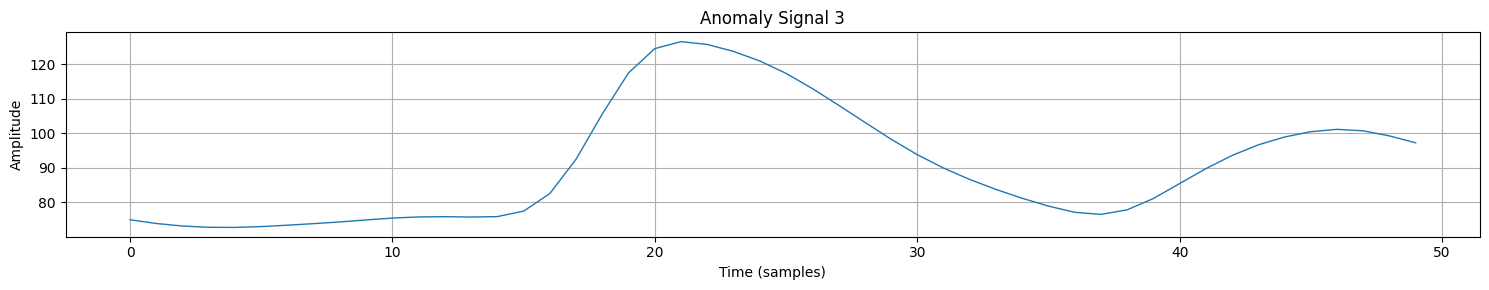

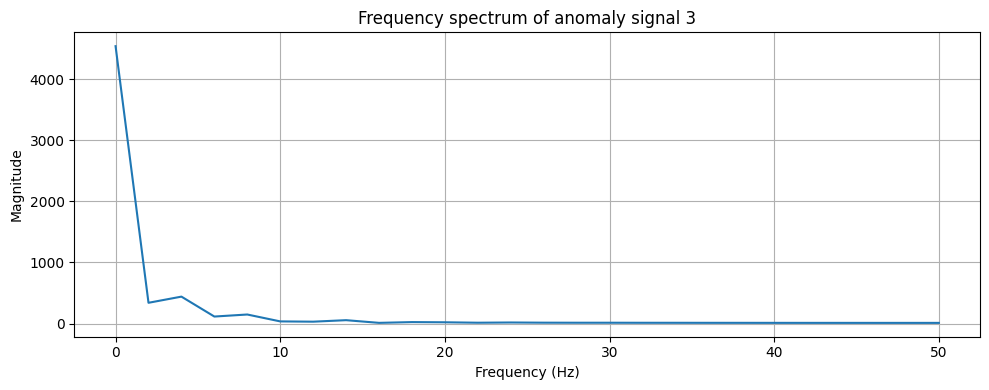

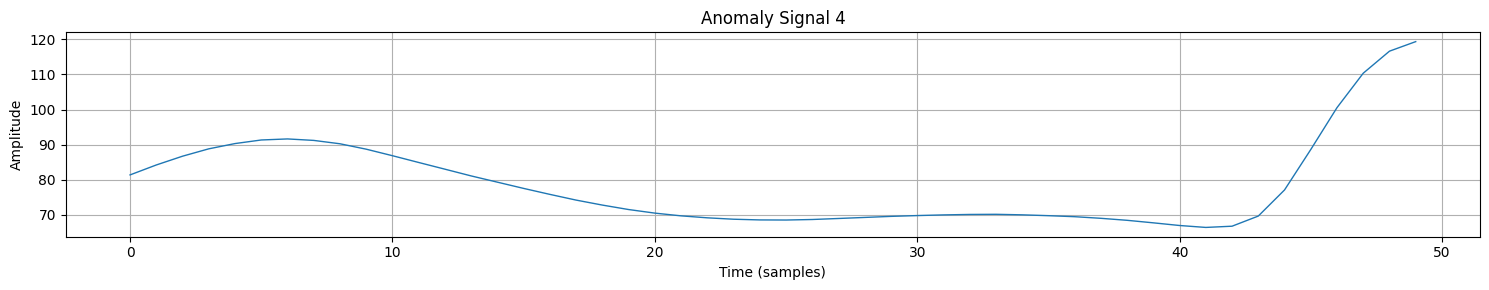

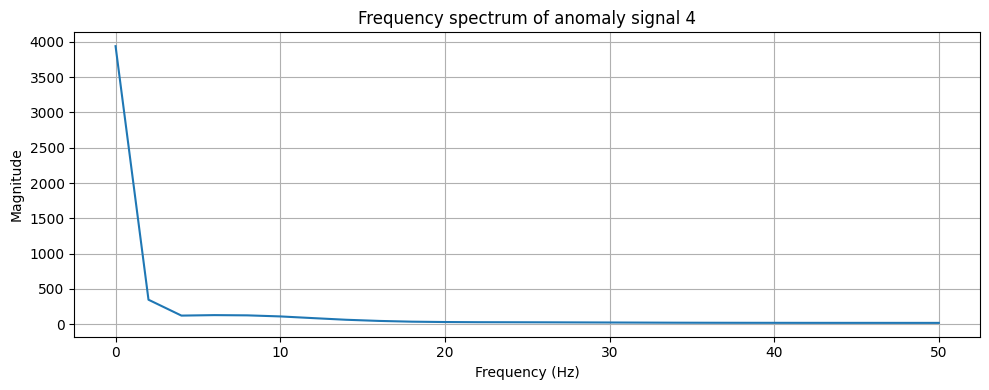

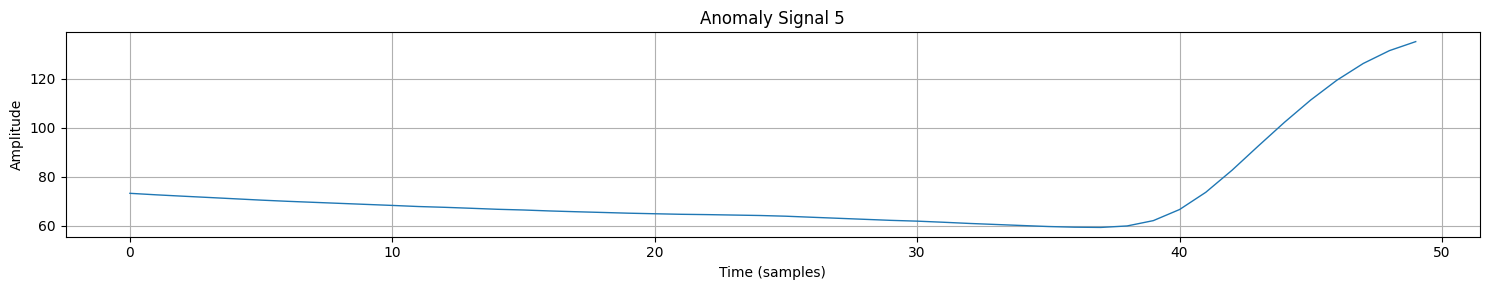

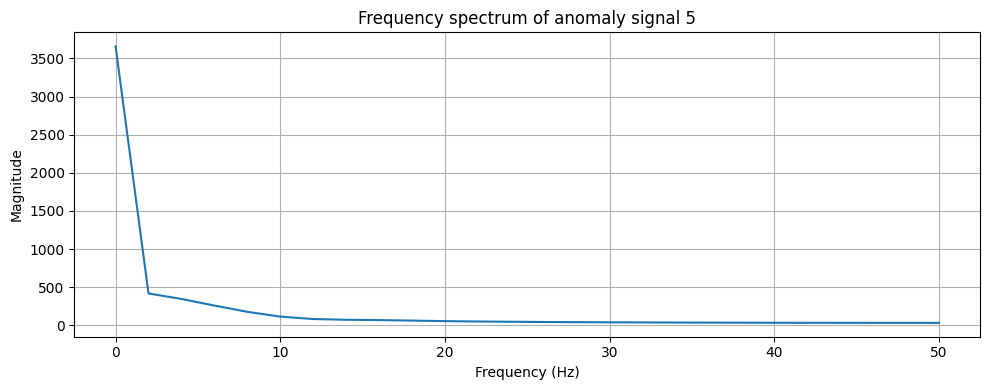

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from lib.loader import FolderExtractor, SingleFileExtractor

HDF_PATH = "data"
SAMPLING_RATE = 100

def load_anomaly_signal(file_path, annotations_path, signal_name="art"):
    extractor = SingleFileExtractor(file_path)
    extractor.auto_annotate(annotations_path)
    _, anomaly_segments = extractor.extract(signal_name)
    if not anomaly_segments:
        print(f"No segments found in {file_path}")
        return []
    extractor.load_data(anomaly_segments)
    all_data = np.concatenate([seg.data for seg in anomaly_segments if seg.data is not None])
    return all_data

def get_file_paths(folder_path):
    folder_extractor = FolderExtractor(folder_path)
    return [e._hdf5_file_path for e in folder_extractor._extractors]

def get_anomaly_frequency_spectrum(signal, sampling_rate=100):
    signal = signal[~np.isnan(signal)]
    N = len(signal)
    f = np.fft.rfftfreq(N, d=1/sampling_rate)
    X = np.fft.rfft(signal)
    return f, np.abs(X)

def plot_anomaly_frequency_spectrum(f, X_mag, title="Frequency Spectrum"):
    plt.figure(figsize=(10, 4))
    plt.plot(f, X_mag)
    plt.title(title)
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def plot_anomaly(signal, title="Anomaly Signal"):
    plt.figure(figsize=(15, 3))
    plt.plot(signal, linewidth=1)
    plt.title(title)
    plt.xlabel("Time (samples)")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

all_files = get_file_paths(HDF_PATH)[:5]
if all_files:
    for idx, file in enumerate(all_files):
        signal = load_anomaly_signal(file, HDF_PATH)[:50]
        if not len(signal):
            continue
        plot_anomaly(signal, title=f"Anomaly Signal {idx + 1}")
        spectrum = get_anomaly_frequency_spectrum(signal[:50], sampling_rate=SAMPLING_RATE)
        if spectrum:
            plot_anomaly_frequency_spectrum(*spectrum, title=f"Frequency spectrum of anomaly signal {idx + 1}")